In [1]:
from __future__ import division
import plotly
import plotly.plotly as py
from plotly import __version__
print(__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cmocean
from plotly import tools
import colorlover as cl
from IPython.display import IFrame
import numpy as np

3.10.0


In [2]:
# df = pd.read_csv("Datasets/cohorts.csv", encoding="latin")
# df.to_csv("Datasets/cohorts.csv", encoding="utf-8")
# df = pd.read_csv("Datasets/cohorts.csv")
# df.to_csv("Datasets/pipeline.csv", encoding="utf-8")
df = pd.read_csv("Datasets/pipeline.csv")

In [3]:
phases = list(df)
phases = phases[1:]
print(phases)

['lead', 'phase2', 'phase3', 'closed']


In [4]:
# values = [len(phases[0], len(phases[1]), len(phases[2]), len(phases[3]))]

In [5]:
df_new = df[['lead', 'phase2', 'phase3', 'closed']]
df_new.head()

,lead,phase2,phase3,closed
0,2015-06-19,2015-07-30,2015-08-11,2015-08-11
1,2015-06-20,2015-07-20,2015-07-20,2015-07-20
2,2015-06-21,NaN,NaN,NaN
3,2015-06-22,2015-06-30,2015-07-13,2015-07-13
4,2015-06-23,NaN,NaN,NaN


In [6]:
# df_sort_1 = df_new.sort_values(by=['phase2'], ascending=True)

In [7]:
# df_sort_1.tail()
len(df)
len(df_new)

10283

In [8]:
# df_sort_1.filter(like='NA', axis='phase2')
# df_new[pd.isnull(df_new).any(axis=1)]
# df_sort_1 = df_new[df_new['phase2'].isnotnull()]
# df_sort_1.tail(4000)
df_sort_1 = df_new[df_new['phase2'].notnull()]
print(len(df_sort_1))

5893


In [9]:
df_sort_2 = df_sort_1[df_sort_1['phase3'].notnull()]
# df_sort_2.head(4000)
print(len(df_sort_2))

5334


In [10]:
df_sort_3 = df_sort_2[df_sort_2['closed'].notnull()]
# df_sort_3.head(4000)
print(len(df_sort_3))

5220


In [11]:
values = [len(df), len(df_sort_1), len(df_sort_2), len(df_sort_3)]
colors = ['#FFFFFF', '#B2DDFF', '#66BBFF', '#008DFF']
n_phase = len(phases)
plot_width = 400

section_h = 100
section_d = 10
print(n_phase)

4


In [12]:
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

height = section_h * n_phase + section_d * (n_phase-1)
shapes = []
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)
    
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

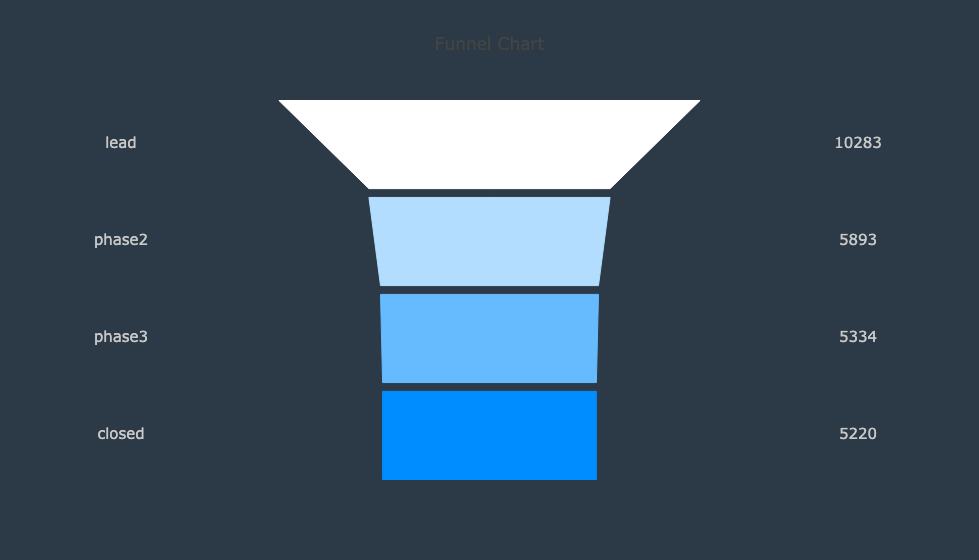

In [13]:
data = [label_trace, value_trace]
 
layout = go.Layout(
    title='Funnel Chart',
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Probability of Lead Returning a Sale

In [14]:
total_lead = len(df)
closed = len(df_sort_3)
sale_prob = closed / total_lead
print("Probability of Lead Resulting in a Sale: "  + str(sale_prob))

Probability of Lead Resulting in a Sale: 0.5076339589613926


Probability of a Sale given Phase 3:

In [15]:
phase_3 = len(df_sort_2)
close_prob = closed / phase_3
print(close_prob)

0.9786276715410573


Order Data

In [16]:
order_df = pd.read_csv("Datasets/sales_data_sample.csv", index_col=0)

In [17]:
order_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [18]:
order_df_USA = order_df.loc[order_df['COUNTRY'] == 'USA']
order_df_USA.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small


In [19]:
ny_df = order_df_USA.loc[order_df['STATE'] == 'NY']

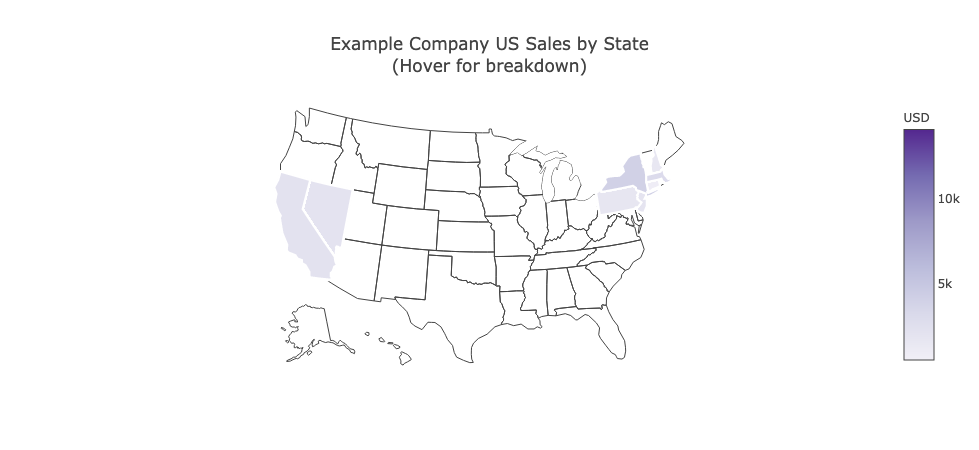

In [20]:
bupu = cl.scales['9']['seq']['BuPu']
bupu500 = cl.interp( bupu, 200 )

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = order_df_USA['STATE'],
    z = order_df_USA['SALES'].astype(float),
    locationmode = 'USA-states',
    text = order_df_USA['STATE'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Example Company US Sales by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename = 'd3-cloropleth-map')

Dash example of an application with maps can be found in the "Dash_Business_Analytics_Demo.py" file in this folder